In [1]:
import  os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers, optimizers, datasets, Sequential
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Dropout,Flatten,Dense



In [2]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


## Label	Description
0	airplane
1	automobile
2	bird
3	cat
4	deer
5	dog
6	frog
7	horse
8	ship
9	*truck*

array([9], dtype=uint8)

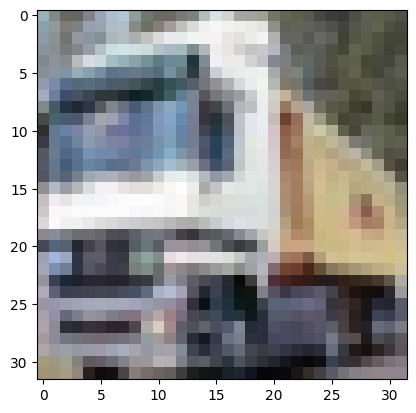

In [3]:
plt.imshow(x_train_raw[1])
y_train_raw[1]

In [5]:
#Convert the category label into onehot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train_raw, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test_raw, num_classes)

x_train = x_train_raw.astype('float32')/255
x_test = x_test_raw.astype('float32')/255
x_train.shape

(50000, 32, 32, 3)

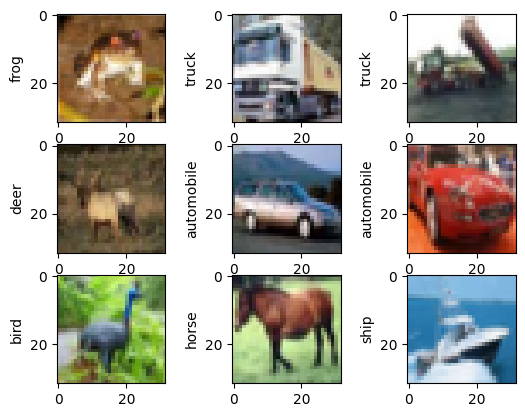

In [6]:
#Create a image tag list
category_dict = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',
                 6:'frog',7:'horse',8:'ship',9:'truck'}
#Show the first 9 images and their labels
plt.figure()
for i in range(9):
    #create a figure with 9 subplots
    plt.subplot(3,3,i+1)
    #show an image
    plt.imshow(x_train_raw[i])
    #show the label
    plt.ylabel(category_dict[y_train_raw[i][0]])
plt.show()


In [7]:
model = Sequential()
model.add(Dense(128 ,input_dim=(3072)))
model.add(Activation('relu'))
model.add(Dense(num_classes))
#map the score of each class into probability
model.add(Activation('softmax'))
opt = keras.optimizers.Adam(0.0001)
loss=tf.keras.losses.categorical_crossentropy
model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
X=x_train.reshape(50000,3072)
model.fit(X,y_train_onehot,epochs=10,batch_size=100)

Epoch 1/10
500/500 [==============================] - 7s 5ms/step - loss: 1.9295 - accuracy: 0.3116
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 1.7782 - accuracy: 0.3778
Epoch 3/10
500/500 [==============================] - 2s 3ms/step - loss: 1.7134 - accuracy: 0.4027
Epoch 4/10
500/500 [==============================] - 2s 3ms/step - loss: 1.6685 - accuracy: 0.4171
Epoch 5/10
500/500 [==============================] - 2s 3ms/step - loss: 1.6313 - accuracy: 0.4329
Epoch 6/10
500/500 [==============================] - 2s 3ms/step - loss: 1.6007 - accuracy: 0.4424
Epoch 7/10
500/500 [==============================] - 2s 3ms/step - loss: 1.5738 - accuracy: 0.4533
Epoch 8/10
500/500 [==============================] - 2s 4ms/step - loss: 1.5562 - accuracy: 0.4603
Epoch 9/10
500/500 [==============================] - 2s 5ms/step - loss: 1.5352 - accuracy: 0.4666
Epoch 10/10
500/500 [==============================] - 2s 4ms/step - loss: 1.5185 - accuracy: 0.4741

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same' ,input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))


model.add(Conv2D(64, (3, 3), padding='same' ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))

model.add(Flatten())
model.add(Dense(128 ))
model.add(Activation('relu'))
model.add(Dense(num_classes))
#map the score of each class into probability
model.add(Activation('softmax'))
opt = keras.optimizers.Adam(0.0001)
loss=tf.keras.losses.categorical_crossentropy
model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation_2 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 activation_3 (Activation)   (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                 

In [18]:
history=model.fit(x_train,y_train_onehot,epochs=10,batch_size=100,validation_split=0.2)

Epoch 1/10
400/400 [==============================] - 4s 9ms/step - loss: 0.6499 - accuracy: 0.7813 - val_loss: 0.6383 - val_accuracy: 0.7834
Epoch 2/10
400/400 [==============================] - 3s 7ms/step - loss: 0.6124 - accuracy: 0.7937 - val_loss: 0.6138 - val_accuracy: 0.7934
Epoch 3/10
400/400 [==============================] - 2s 6ms/step - loss: 0.5901 - accuracy: 0.8003 - val_loss: 0.6022 - val_accuracy: 0.7968
Epoch 4/10
400/400 [==============================] - 2s 6ms/step - loss: 0.5733 - accuracy: 0.8072 - val_loss: 0.5945 - val_accuracy: 0.7990
Epoch 5/10
400/400 [==============================] - 2s 6ms/step - loss: 0.5583 - accuracy: 0.8116 - val_loss: 0.5905 - val_accuracy: 0.8022
Epoch 6/10
400/400 [==============================] - 2s 6ms/step - loss: 0.5457 - accuracy: 0.8159 - val_loss: 0.5804 - val_accuracy: 0.8061
Epoch 7/10
400/400 [==============================] - 3s 7ms/step - loss: 0.5329 - accuracy: 0.8193 - val_loss: 0.5792 - val_accuracy: 0.8035
Epoch 

Text(0.5, 1.0, 'CIFAR10 Accurcy')

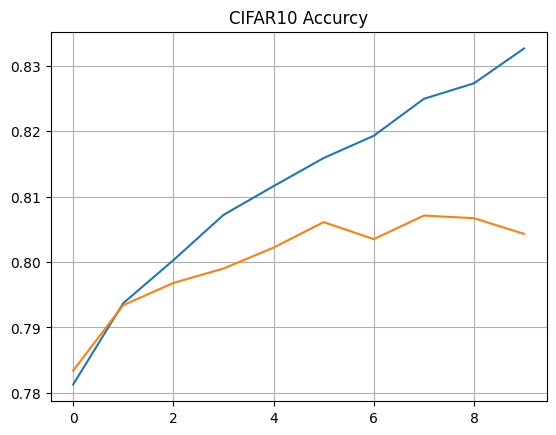

In [19]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.grid()
plt.title("CIFAR10 Accurcy")

Text(0.5, 1.0, 'CIFAR10 Loss')

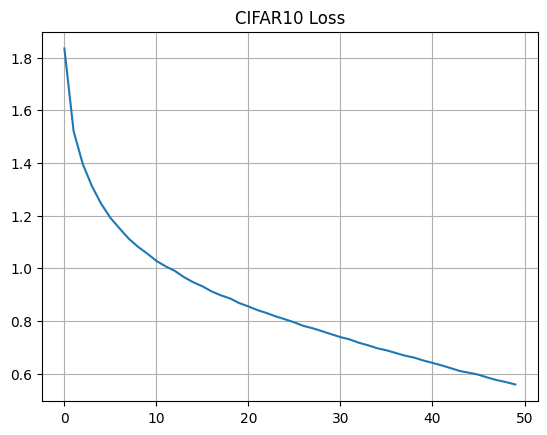

In [12]:
plt.plot(history.history["loss"])
plt.grid()
plt.title("CIFAR10 Loss")

In [ ]:
model.save("my_model_v1.h5")

array([8], dtype=uint8)

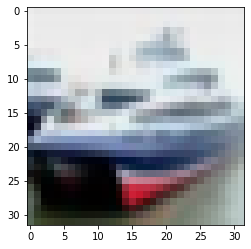

In [ ]:
plt.imshow(x_test[1])
y_test_raw[1]

In [14]:
model.predict(x_test[1:2]).argmax(axis=1)

1/1 [==============================] - 0s 76ms/step


array([8])

In [ ]:
pred=model.predict(x_test[1:2]).argmax(axis=1)

In [ ]:
category_dict[pred[0]]


'ship'

In [ ]:
pred=model.predict(x_test)

model.evaluate(x_test,y_test_onehot)

313/313 [==============================] - 2s 5ms/step - loss: 0.8923 - accuracy: 0.7001


[0.8922849893569946, 0.7001000046730042]

In [ ]:

gh_model = keras.models.load_model('/content/my_model_v1.h5')

In [ ]:
gh_model.evaluate(x_test,y_test_onehot)

313/313 [==============================] - 2s 5ms/step - loss: 0.8923 - accuracy: 0.7001


[0.8922849893569946, 0.7001000046730042]